In [ ]:
import numpy as np #import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [4]:
dataset = pd.read_csv('/content/Mall_Customers.csv') #load your dataset

In [5]:
dataset.columns= ['ID', 'Gender', 'Age', 'Income', 'Spend_score']  #rename the columns in your dataset for ease of reading
dataset.head() #view the first and last five values of your dataset

,ID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
dataset.isnull().sum()  #check for any null values in your dataset

ID             0
Gender         0
Age            0
Income         0
Spend_score    0
dtype: int64

In [7]:
x = dataset[['Income', 'Spend_score']]  #choose your input x features in your dataset
dist = []  #initialize an empty array to store the distortion values for k
for i in range(1,11): #find the distortion values for k ranging from 1 to 10
    kmeans = KMeans(n_clusters= i, init='k-means++')
    kmeans.fit(x)
    dist.append(kmeans.inertia_)

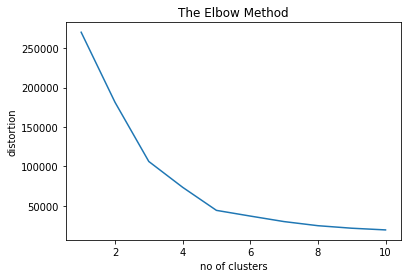

In [8]:
plt.plot(range(1,11), dist) #plot distortion vs k : Elbow method
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('distortion')
plt.show()

In [9]:
model = KMeans(n_clusters = 5,init='k-means++') #redefine your model with the optimal value of k from above graph

In [12]:
pred= model.fit_predict(x) #train your model and predict it's performance on the dataset
print(pred)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [15]:
centers = model.cluster_centers_  #find out what the 5 centroids/cluster centers are
print(centers)

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


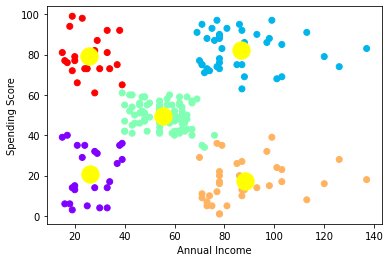

In [17]:
plt.scatter(x['Income'], x['Spend_score'], c=pred, cmap='rainbow')  #plot your k means centers and clusters
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(centers[:, 0], centers[:, 1], s = 300, c = 'yellow')